## **Describing Distributions (Core)**

#### **Author: P. Slabber**

In this assignment, you will be analyzing & visualizing several features in the Medical Dataset.

- The features to analyze: 
   - VitD_levels
   - Doc_visits
   - TotalCharge
     
**For each feature listed:**

- Plot a histogram with a kde (kernel density estimate)
   - Add a line for the mean (red)
   - Add a line for the median (green)
   - Add a line for for +1 std from the mean (black)
   - Add a line for the - 1 std from the mean (black)
   - Highlight the range between +1 and =1 std (yellow)
- Answer the following questions:
   - Is it Discrete or Continuous?
   - Does it have a skew? If so, which direction (+/-)
   - What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_context('talk')
mpl.rcParams['figure.figsize'] = [12,6]

In [4]:
url = 'https://docs.google.com/spreadsheets/d/1APV3pXiAszS_0mSgkiEt9IUNH-QmyX7KwxSAwuADl6Y/gviz/tq?tqx=out:csv&sheet=medical_data'
df = pd.read_csv(url, index_col = 0)
df.head()

,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
State,,,,,,,,,,,,,,,,,,,,,
AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,19.141466,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,18.940352,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,18.057507,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,16.576858,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,17.439069,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


#### **Analyzing and Visualizing 'VitD_levels'**

<Axes: xlabel='VitD_levels', ylabel='Probability'>

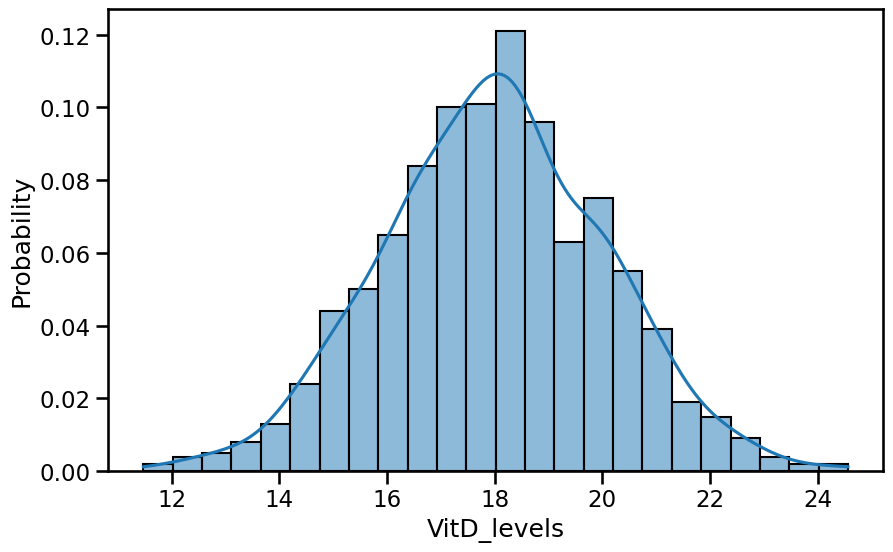

In [31]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['VitD_levels'], ax = ax, stat='probability', kde=True)

In [ ]:
** It is a normalized distribution**

#### **Calculating Probabilities with Scipy's Probability Density Functions**
#### **Calculate the Mean**


In [32]:
## Get the mean, std, min, and max for the Avg Grade column
dist_stats = df['VitD_levels'].agg(['mean','std','min','max'])
dist_stats

mean    17.992381
std      2.056366
min     11.475314
max     24.565463
Name: VitD_levels, dtype: float64

In [43]:
## generate a linearly-spaced array of values that span the min to the max
xs =  np.linspace(dist_stats.loc['min'], dist_stats.loc['max'],)
xs

array([11.47531413, 11.74246002, 12.00960591, 12.27675181, 12.5438977 ,
       12.81104359, 13.07818948, 13.34533537, 13.61248127, 13.87962716,
       14.14677305, 14.41391894, 14.68106483, 14.94821073, 15.21535662,
       15.48250251, 15.7496484 , 16.01679429, 16.28394019, 16.55108608,
       16.81823197, 17.08537786, 17.35252375, 17.61966965, 17.88681554,
       18.15396143, 18.42110732, 18.68825322, 18.95539911, 19.222545  ,
       19.48969089, 19.75683678, 20.02398268, 20.29112857, 20.55827446,
       20.82542035, 21.09256624, 21.35971214, 21.62685803, 21.89400392,
       22.16114981, 22.4282957 , 22.6954416 , 22.96258749, 23.22973338,
       23.49687927, 23.76402516, 24.03117106, 24.29831695, 24.56546284])

In [33]:
mean = df['VitD_levels'].mean()
mean

17.992380894860002

#### ** Ad a line for the mean**

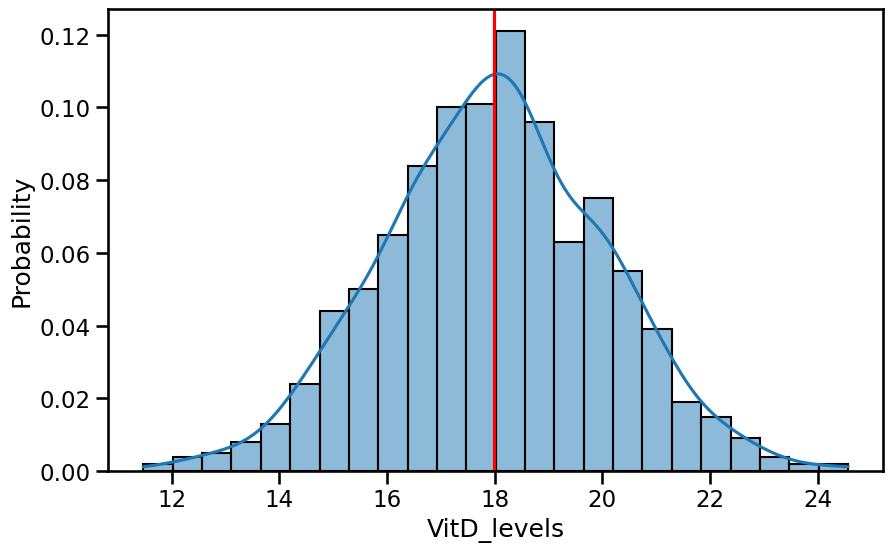

In [34]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['VitD_levels'], ax = ax, stat='probability', kde=True)
ax.axvline(mean, color = 'red');

#### **Calculate the Median**

In [21]:
median = df['VitD_levels'].median()
median

18.020163095

#### ** Ad a line for the median**

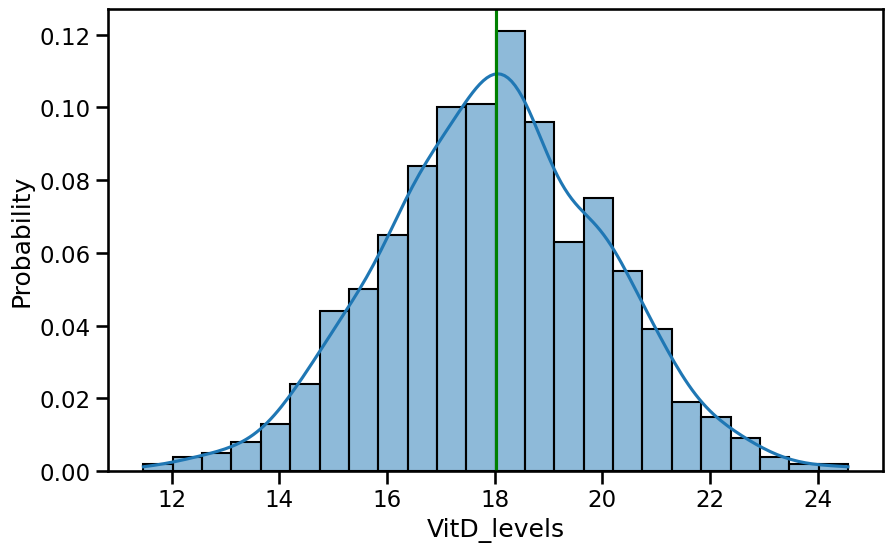

In [35]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['VitD_levels'], ax = ax, stat='probability', kde=True)
ax.axvline(median, color = 'green');

#### **Add a line for for +1 std from the mean (black)** 

and

#### **Add a line for the - 1 std from the mean (black)**

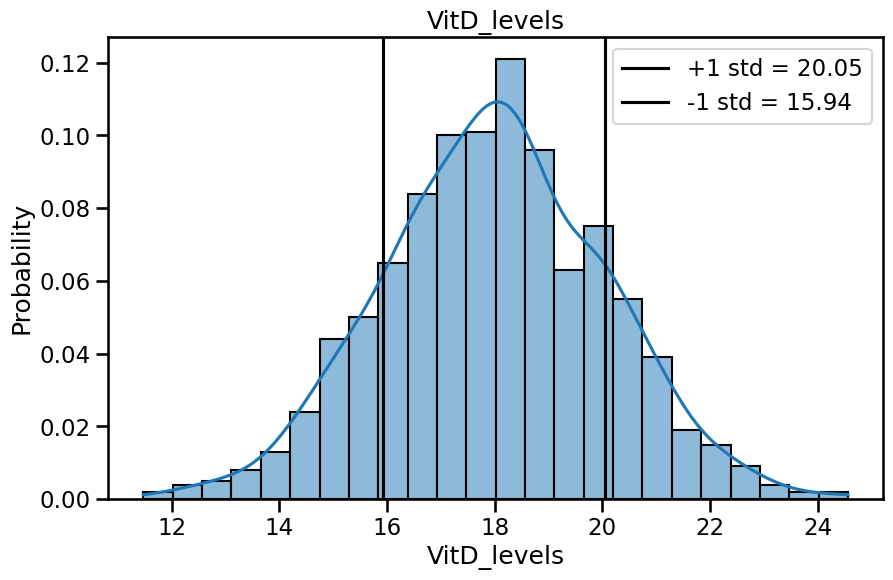

In [36]:
col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde=True)
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.set_title(f'{col}')
ax.legend();

#### **Highlight the range between +1 and =1 std (yellow)**

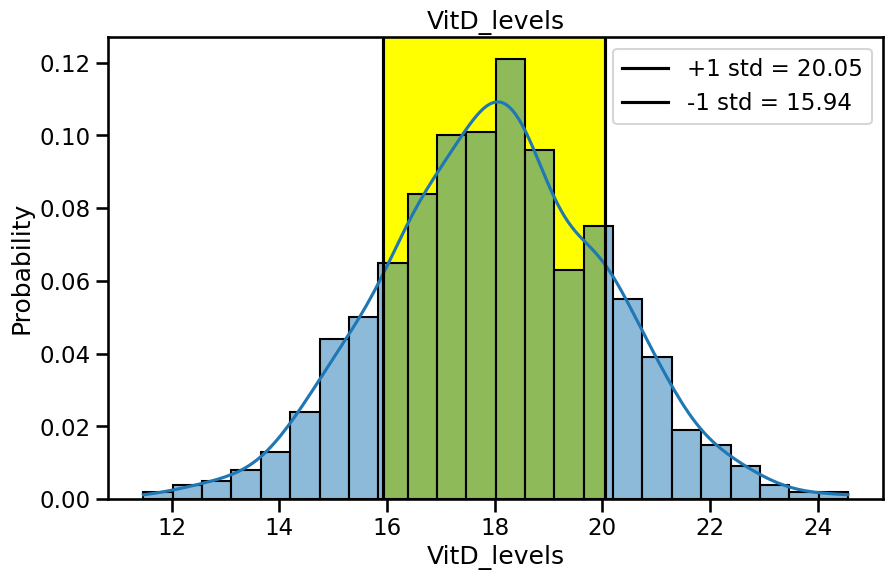

In [37]:
col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde=True)
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow',zorder=0)
ax.set_title(f'{col}')
ax.legend();

#### **Analyzing and Visualizing 'Doc_visits'**

<Axes: xlabel='Doc_visits', ylabel='Probability'>

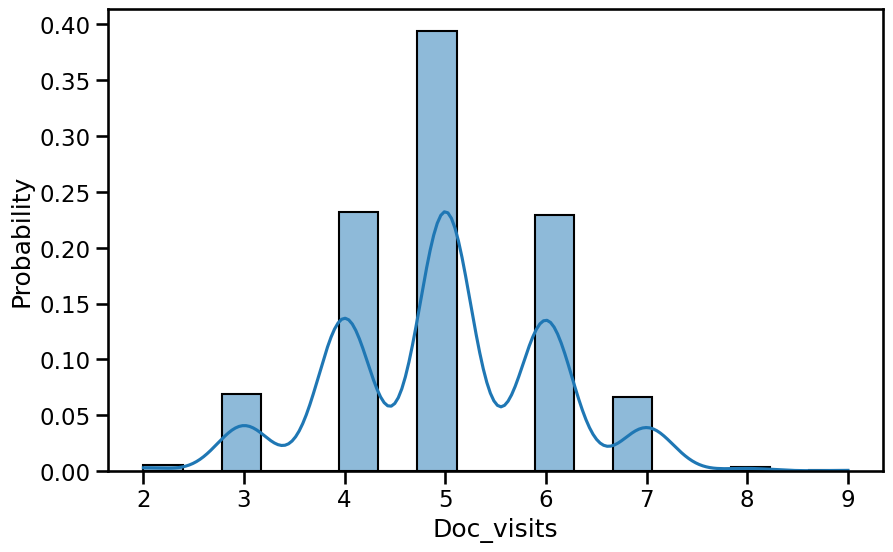

In [54]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['Doc_visits'], ax = ax, stat='probability', kde=True)

#### **Calculating Probabilities with Scipy's Probability Density Functions**
#### **Calculate the Mean**

In [55]:
## Get the mean, std, min, and max for the Avg Grade column
dist_stats = df['Doc_visits'].agg(['mean','std','min','max'])
dist_stats

mean    4.992000
std     1.048349
min     2.000000
max     9.000000
Name: Doc_visits, dtype: float64

In [57]:
## generate a linearly-spaced array of values that span the min to the max
xs_1 =  np.linspace(dist_stats.loc['min'], dist_stats.loc['max'],)
xs_1

array([2.        , 2.14285714, 2.28571429, 2.42857143, 2.57142857,
       2.71428571, 2.85714286, 3.        , 3.14285714, 3.28571429,
       3.42857143, 3.57142857, 3.71428571, 3.85714286, 4.        ,
       4.14285714, 4.28571429, 4.42857143, 4.57142857, 4.71428571,
       4.85714286, 5.        , 5.14285714, 5.28571429, 5.42857143,
       5.57142857, 5.71428571, 5.85714286, 6.        , 6.14285714,
       6.28571429, 6.42857143, 6.57142857, 6.71428571, 6.85714286,
       7.        , 7.14285714, 7.28571429, 7.42857143, 7.57142857,
       7.71428571, 7.85714286, 8.        , 8.14285714, 8.28571429,
       8.42857143, 8.57142857, 8.71428571, 8.85714286, 9.        ])

In [59]:
mean = df['Doc_visits'].mean()
mean

4.992

#### ** Ad a line for the mean**

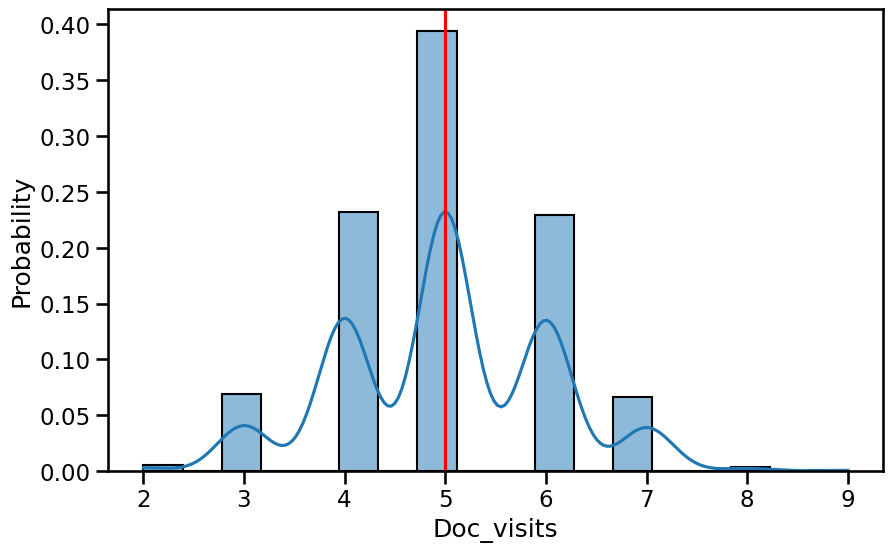

In [60]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['Doc_visits'], ax = ax, stat='probability', kde=True)
ax.axvline(mean, color = 'red');

#### **Add a line for for +1 std from the mean (black)** 

and

#### **Add a line for the - 1 std from the mean (black)**

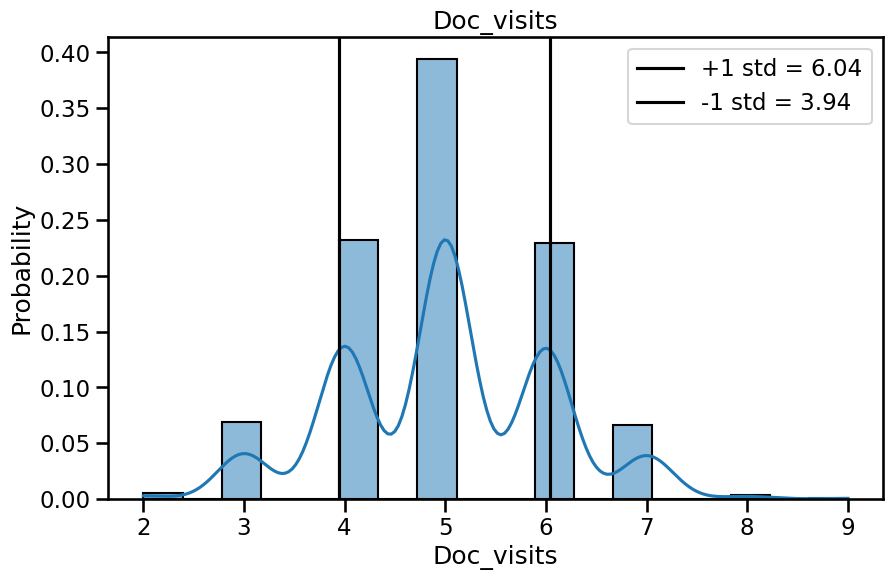

In [61]:
col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde=True)
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.set_title(f'{col}')
ax.legend();

#### **Highlight the range between +1 and =1 std (yellow)**

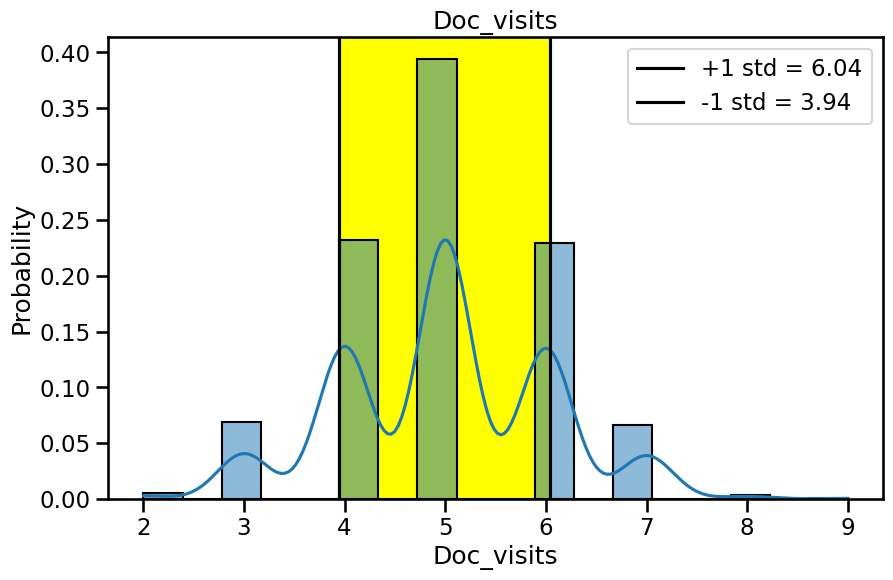

In [62]:
col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde=True)
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow',zorder=0)
ax.set_title(f'{col}')
ax.legend();

#### **Analyzing and Visualizing 'TotalCharge'**

<Axes: xlabel='TotalCharge', ylabel='Probability'>

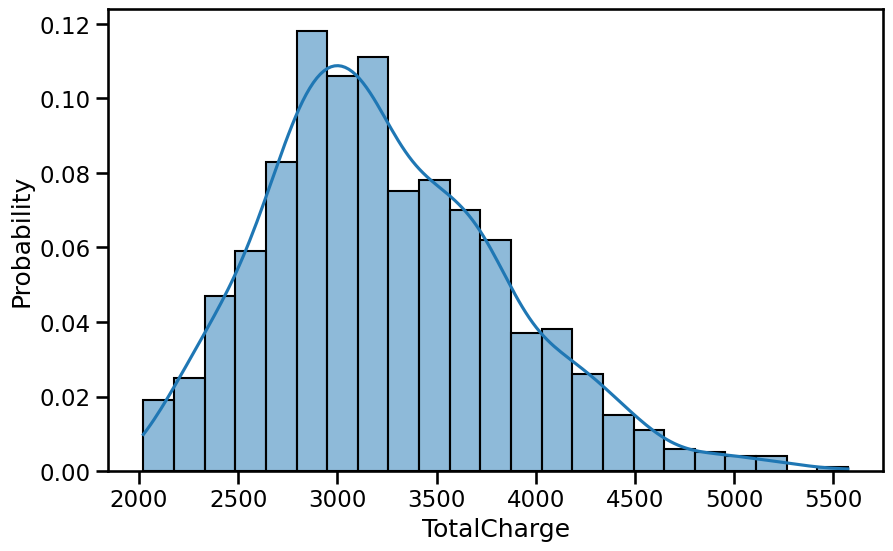

In [63]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['TotalCharge'], ax = ax, stat='probability', kde=True)

#### **Calculating Probabilities with Scipy's Probability Density Functions**
#### **Calculate the Mean**

In [64]:
## Get the mean, std, min, and max for the Avg Grade column
dist_stats = df['TotalCharge'].agg(['mean','std','min','max'])
dist_stats

mean    3240.971613
std      600.413722
min     2022.650007
max     5572.846022
Name: TotalCharge, dtype: float64

In [65]:
## generate a linearly-spaced array of values that span the min to the max
xs_2 =  np.linspace(dist_stats.loc['min'], dist_stats.loc['max'],)
xs_2

array([2022.650007  , 2095.1029869 , 2167.5559668 , 2240.00894669,
       2312.46192659, 2384.91490649, 2457.36788639, 2529.82086629,
       2602.27384618, 2674.72682608, 2747.17980598, 2819.63278588,
       2892.08576578, 2964.53874567, 3036.99172557, 3109.44470547,
       3181.89768537, 3254.35066527, 3326.80364516, 3399.25662506,
       3471.70960496, 3544.16258486, 3616.61556476, 3689.06854465,
       3761.52152455, 3833.97450445, 3906.42748435, 3978.88046424,
       4051.33344414, 4123.78642404, 4196.23940394, 4268.69238384,
       4341.14536373, 4413.59834363, 4486.05132353, 4558.50430343,
       4630.95728333, 4703.41026322, 4775.86324312, 4848.31622302,
       4920.76920292, 4993.22218282, 5065.67516271, 5138.12814261,
       5210.58112251, 5283.03410241, 5355.48708231, 5427.9400622 ,
       5500.3930421 , 5572.846022  ])

In [66]:
mean = df['TotalCharge'].mean()
mean

3240.9716133389998

#### ** Ad a line for the mean**

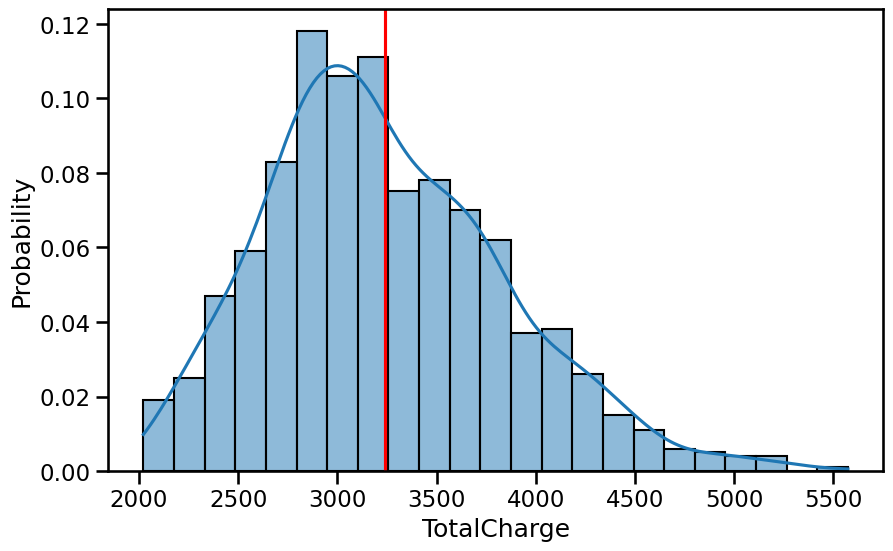

In [67]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['TotalCharge'], ax = ax, stat='probability', kde=True)
ax.axvline(mean, color = 'red');

#### **Add a line for for +1 std from the mean (black)** 

and

#### **Add a line for the - 1 std from the mean (black)**

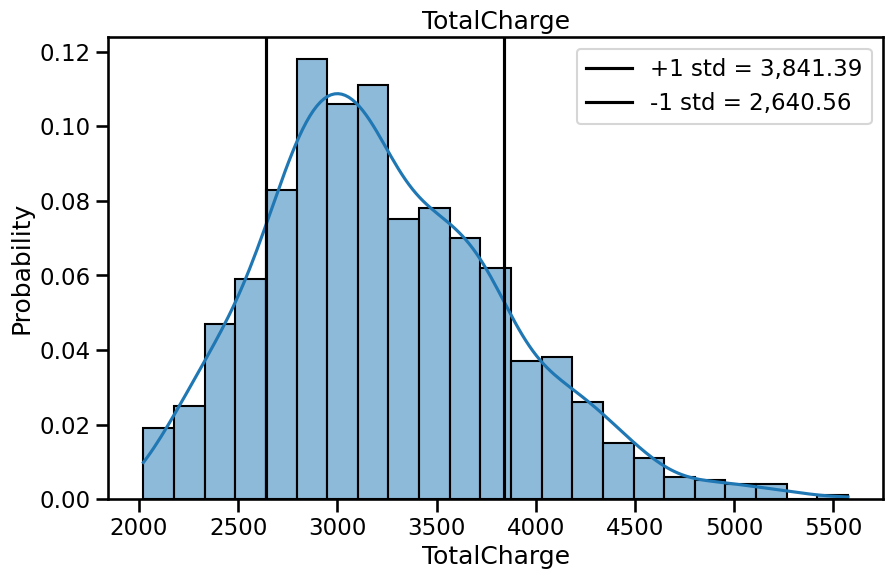

In [68]:
col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde=True)
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.set_title(f'{col}')
ax.legend();

#### **Highlight the range between +1 and =1 std (yellow)**

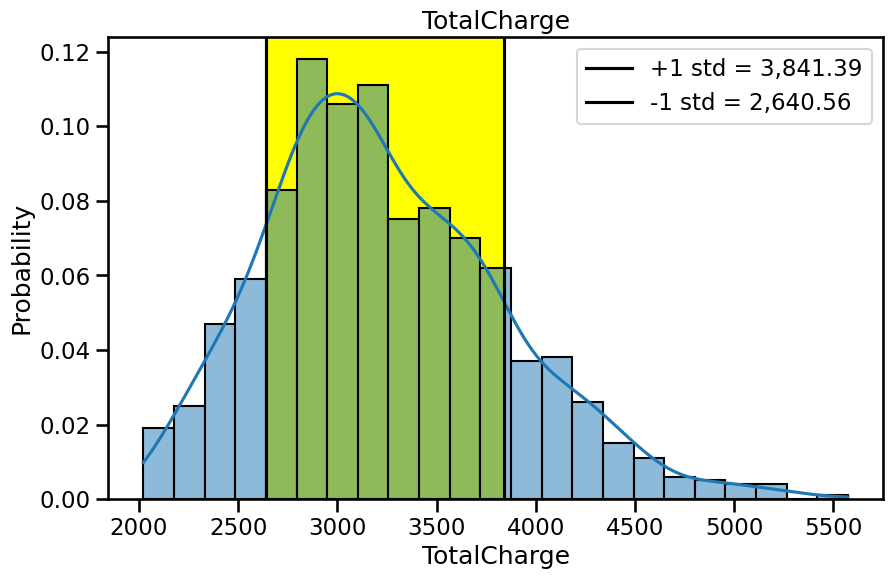

In [69]:
col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability', kde=True)
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow',zorder=0)
ax.set_title(f'{col}')
ax.legend();

#### **Answer the following questions:**

#### **Is it Discrete or Continuous?**

**PDFs is a continuous function**

#### **Does it have a skew? If so, which direction (+/-)**

**I do not see a skew on the 'VitD_levels' Feature**

**I do not see a skew on the 'Doc_visits' Feature**

**I see a positive skew on the 'TotalCharge' Feature**

#### **What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)**

Kurtosis is a statistical term that characterizes frequency distribution. Aside from determining if a distribution is heavy-tailed, it also provides insight into the shape of the frequency distribution.

**Mesokurtic:**

A mesokurtic distribution has kurtosis equal to 0.
The distribution has tails that are neither too heavy (leptokurtic) nor too light (platykurtic).
The peak of the distribution is similar to that of a normal distribut


**leptokurtic** 

has positive kurtosis.
The tails of the distribution are heavier than those of a normal distribution, indicating more extreme values.
This means that the distribution has more values in the tails and fewer in the center compared to a normal distribution.

**Platykurtic:**

distribution has negative kurtosis.
The tails of the distribution are lighter than those of a normal distribution, indicating fewer extreme values.
This means that the distribution has fewer values in the tails and more in the center compared to a normal distribution.

In [52]:
# Calculate Kurtosis for 'VitD_Levels'
from scipy.stats import kurtosis
## array = ['VitD_levels']
print(kurtosis(xs, fisher=False))

1.7990396158463384


In [58]:
# Calculate Kurtosis for 'Doc_visits'
from scipy.stats import kurtosis
## array = ['VitD_levels']
print(kurtosis(xs_1, fisher=False))

1.7990396158463382


In [72]:
# Calculate Kurtosis for 'TotalCharge'
from scipy.stats import kurtosis
## array = ['VitD_levels']
print(kurtosis(xs_2, fisher=False))

1.7990396158463386


**Answer: The 'VitD_levels', 'Doc_visits' and 'TotalCharge' distribution shows Leptokurtic kutosis.**